In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Business Requirement

 - As a business manager, try to find out the weak areas where you can work to
make more profit.

 - What all business problems you can derive by exploring the data?

### Loading Dataset

In [2]:
data=pd.read_csv("SampleSuperstore.csv")

### Preview of data

In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.columns= data.columns.str.replace(" ","_") #Replacing white space column headeer with "_"

In [5]:
data.shape #Shape of the dataset

(9994, 13)

In [6]:
data.drop_duplicates(inplace=True) #dropping duplicate records

In [7]:
data.isnull().sum() #Checking for missing values

Ship_Mode       0
Segment         0
Country         0
City            0
State           0
Postal_Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
data.dtypes #Data type of all columns

Ship_Mode        object
Segment          object
Country          object
City             object
State            object
Postal_Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

### Descriptive statistics of dataset

In [9]:
data.drop("Postal_Code",axis=1).describe().T #Excluded postal code feature as its a categorical datatype

,count,mean,std,min,25%,50%,75%,max
Sales,9977.0,230.148902,623.721409,0.444,17.3000,54.816,209.970,22638.480
Quantity,9977.0,3.790719,2.226657,1.000,2.0000,3.000,5.000,14.000
Discount,9977.0,0.156278,0.206455,0.000,0.0000,0.200,0.200,0.800
Profit,9977.0,28.690130,234.457840,-6599.978,1.7262,8.671,29.372,8399.976


### Exploring the dataset

In [10]:
data.head()

,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [11]:
data.Segment.value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

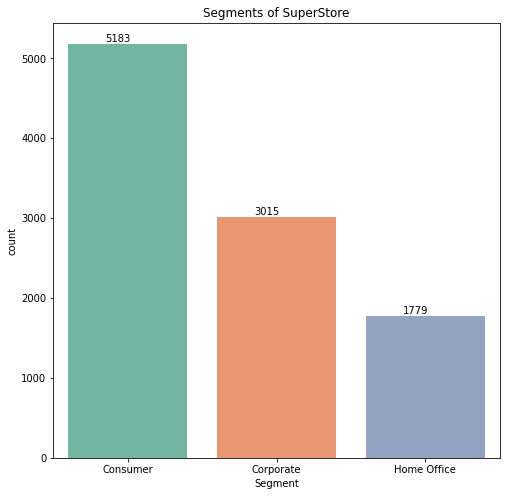

In [12]:
plt.figure(figsize=(8,8))
ax=sns.countplot(data.Segment,palette="Set2");
for p in ax.patches:
    ax.annotate(int(p.get_height()),
                (p.get_x()+0.25, 
                 p.get_height()+1), 
                 va='bottom',
                 color= 'black')
plt.title("Segments of SuperStore");

#### More Orders are from Consumer Segment

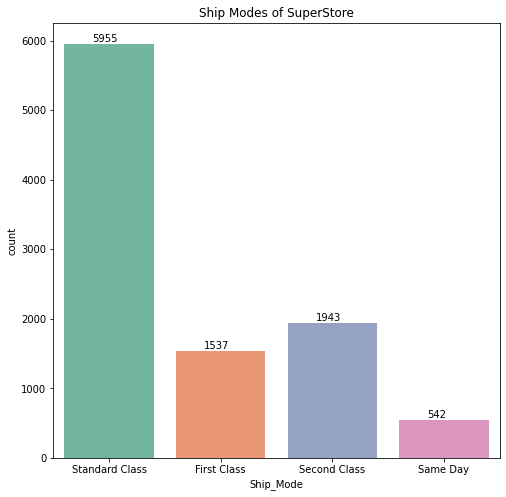

In [13]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x="Ship_Mode",data=data.sort_values(by="Sales",ascending=False),palette="Set2");
for p in ax.patches:
    ax.annotate(int(p.get_height()),
                (p.get_x()+0.25, 
                 p.get_height()+1), 
                 va='bottom',
                 color= 'black')
plt.title("Ship Modes of SuperStore");

#### More Orders are from Standard shipping mode

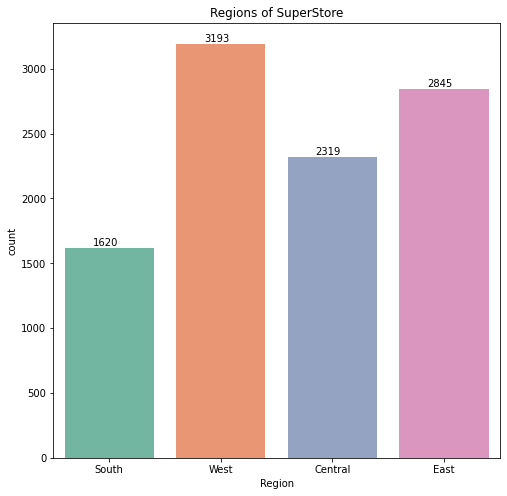

In [14]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x="Region",data=data,palette="Set2");
for p in ax.patches:
    ax.annotate(int(p.get_height()),
                (p.get_x()+0.25, 
                 p.get_height()+1), 
                 va='bottom',
                 color= 'black')
plt.title("Regions of SuperStore");

#### More Orders are from West Region

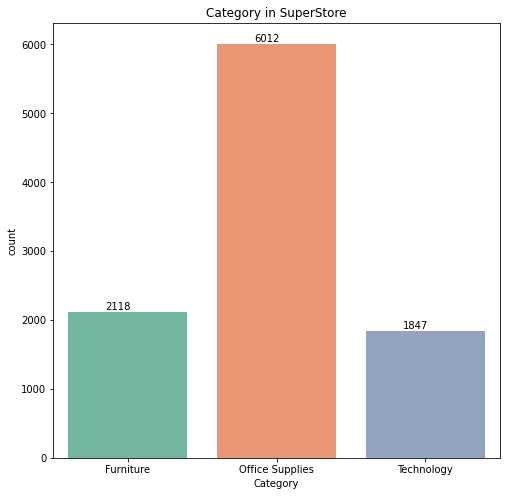

In [15]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x="Category",data=data,palette="Set2");
for p in ax.patches:
    ax.annotate(int(p.get_height()),
                (p.get_x()+0.25, 
                 p.get_height()+1), 
                 va='bottom',
                 color= 'black')
plt.title("Category in SuperStore");

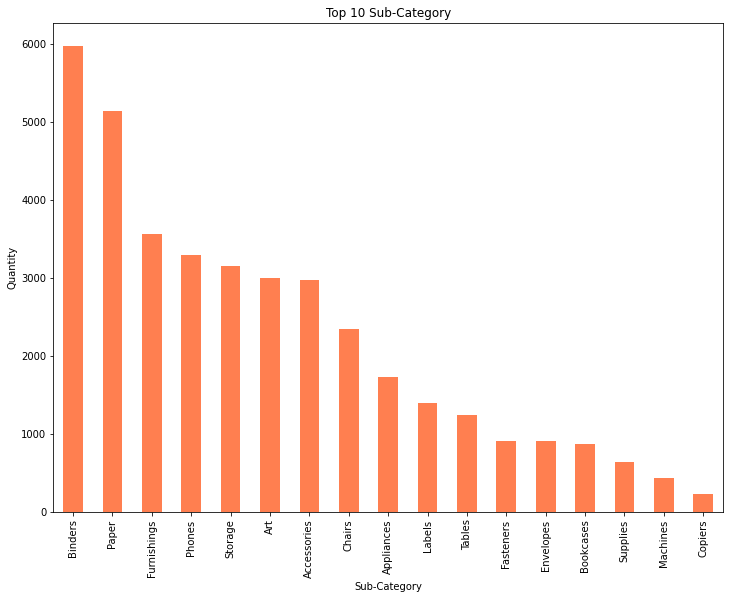

In [16]:
data.groupby("Sub-Category").Quantity.sum().sort_values(ascending=False).plot(kind="bar",figsize=(12,9),color="coral");
plt.title("Top 10 Sub-Category");
plt.ylabel("Quantity");

 - Binders,Paper and Furnishing are top 3 Sub-Category based on quantity

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


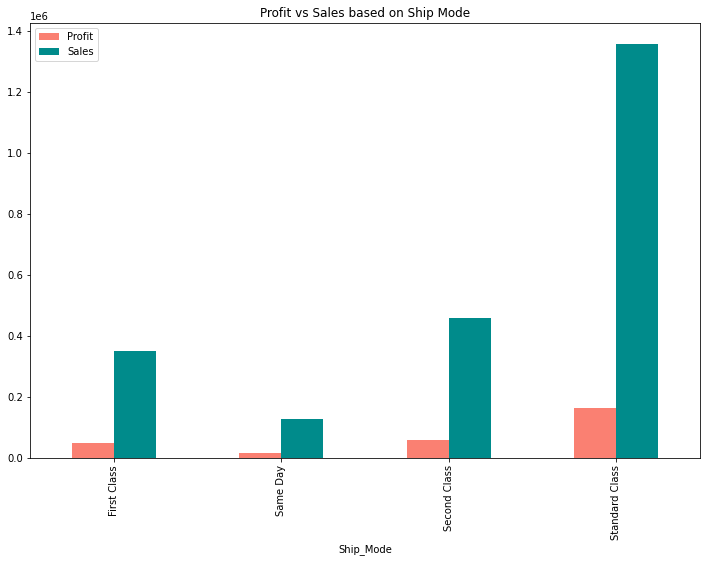

In [17]:
data.groupby("Ship_Mode")["Profit","Sales"].sum().plot(kind="bar",figsize=(12,8),color=["salmon","darkcyan"]);
plt.title("Profit vs Sales based on Ship Mode");

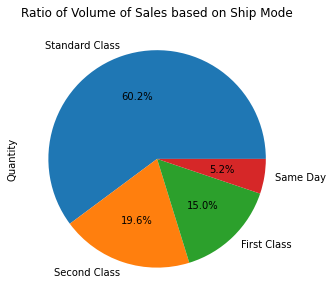

In [18]:
data.groupby("Ship_Mode").Quantity.sum().sort_values(ascending=False).plot(kind="pie",figsize=(8,5),autopct = '%1.1f%%')
plt.title("Ratio of Volume of Sales based on Ship Mode");

 - **Standard shipping mode** has 60% Sales
 - **Standard shipping mode** has high Sales and profit
 - **Sameday shipping mode** has low Sales and low profit

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


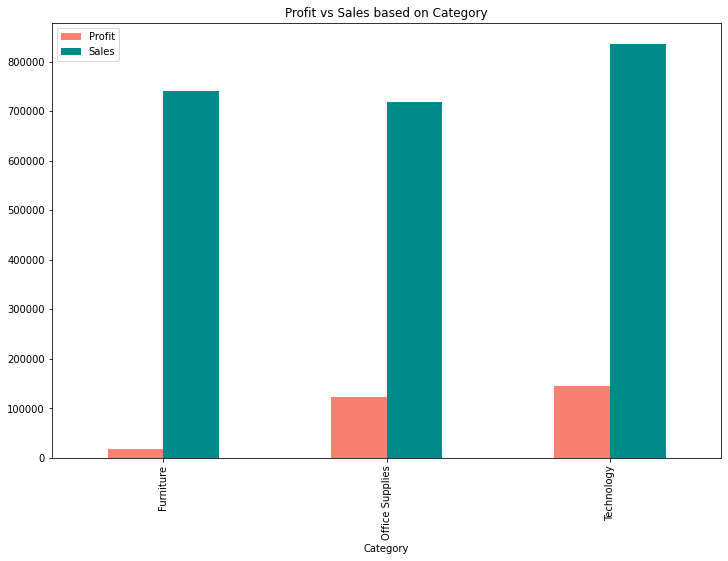

In [19]:
data.groupby("Category")["Profit","Sales"].sum().plot(kind="bar",figsize=(12,8),color=["salmon","darkcyan"]);
plt.title("Profit vs Sales based on Category");

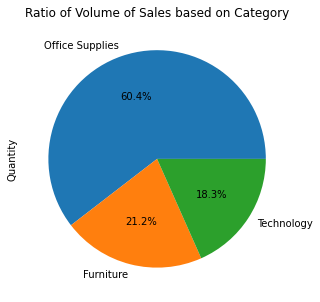

In [20]:
data.groupby("Category").Quantity.sum().sort_values(ascending=False).plot(kind="pie",figsize=(8,5),autopct = '%1.1f%%')
plt.title("Ratio of Volume of Sales based on Category");

- **Office Supplies Category** has 60% of Sales Quantity
- **Technology Category** has High Sales and profit
- **Furniture Category** has Low Sales and Low profit

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


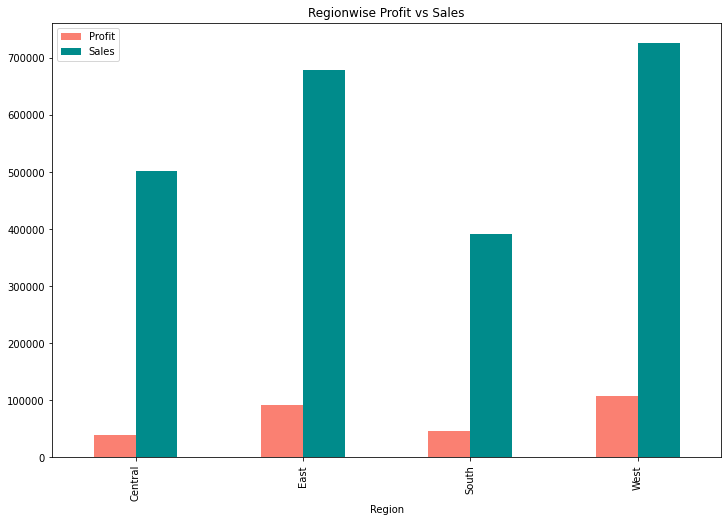

In [21]:
data.groupby("Region")["Profit","Sales"].sum().plot(kind="bar",figsize=(12,8),color=["salmon","darkcyan"]);
plt.title("Regionwise Profit vs Sales");

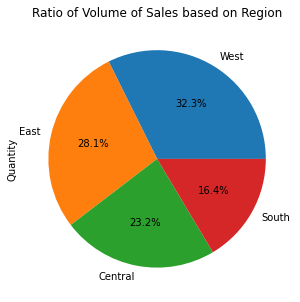

In [22]:
data.groupby("Region").Quantity.sum().sort_values(ascending=False).plot(kind="pie",figsize=(8,5),autopct = '%1.1f%%')
plt.title("Ratio of Volume of Sales based on Region");

 - **Western Region** has high quantity of Sales of 30%.
 - **Western Region** has high Sales and profit.
 - **Southern Region** Category has low Sales but **Central Region** Category has low profit.

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


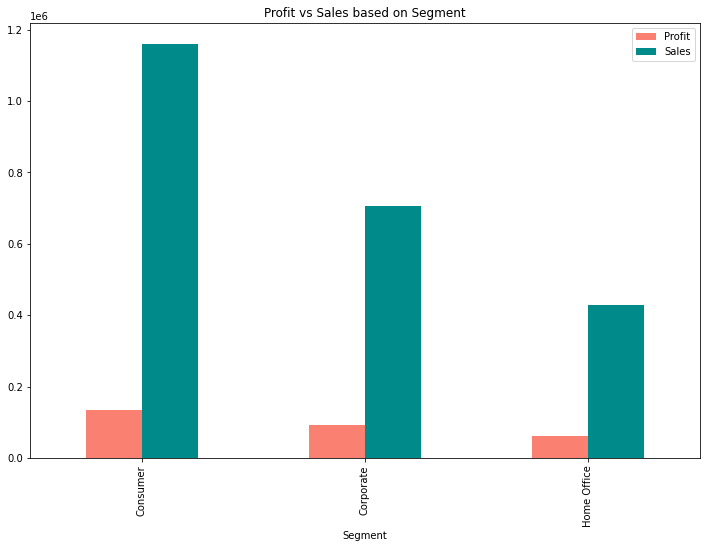

In [23]:

data.groupby("Segment")["Profit","Sales"].sum().plot(kind="bar",figsize=(12,8),color=["salmon","darkcyan"])
plt.title("Profit vs Sales based on Segment");

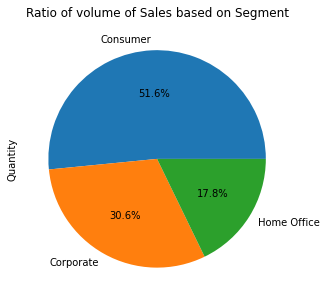

In [24]:
data.groupby("Segment").Quantity.sum().plot(kind="pie",figsize=(8,5),autopct = '%1.1f%%')
plt.title("Ratio of volume of Sales based on Segment");

 - **Consumer Segment** has high quantity of Sales of 51%.
 - **Consumer Segment** has high Sales and profit.
 - **Home_Office Segment** Category has low Sales and low profit.

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


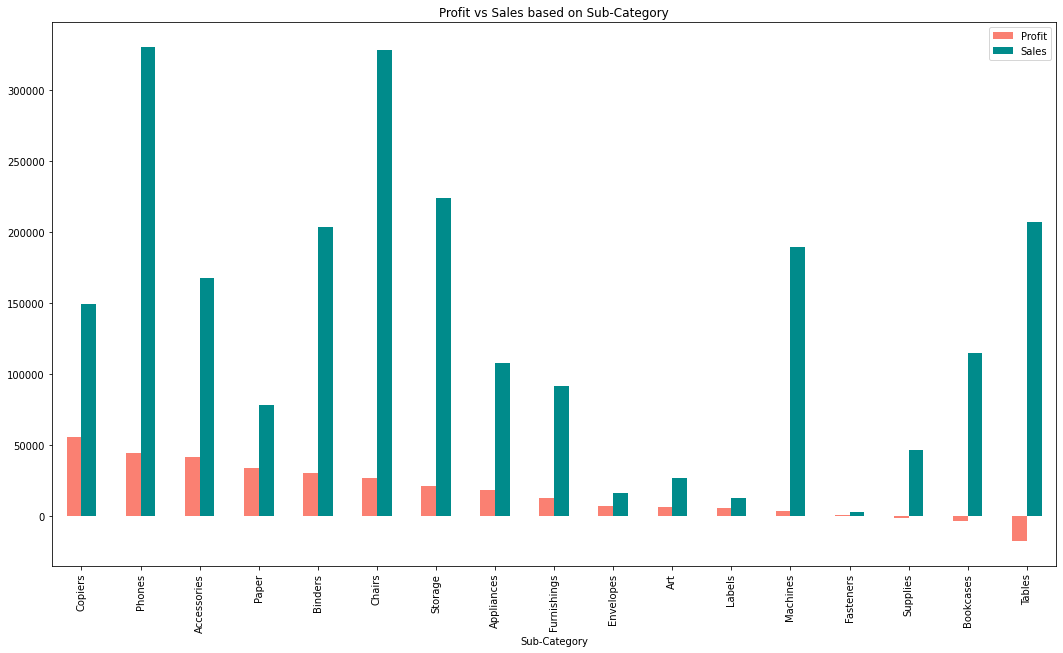

In [25]:
data.groupby("Sub-Category")["Profit","Sales"].sum().sort_values(by="Profit",ascending=False).plot(kind="bar",figsize=(18,10),color=["salmon","darkcyan"]);
plt.title("Profit vs Sales based on Sub-Category");

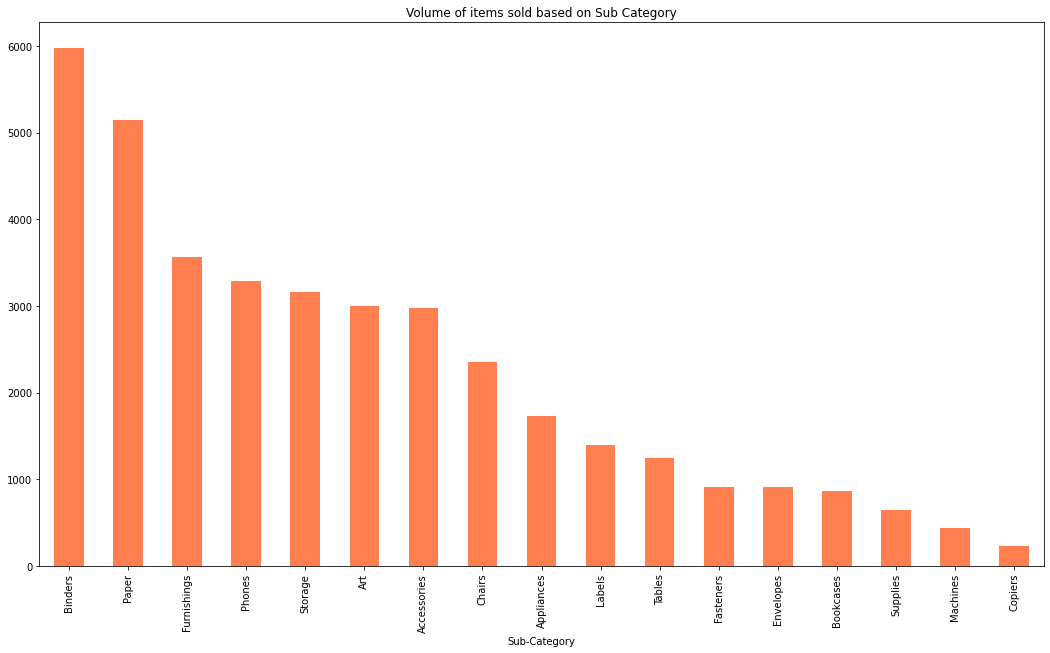

In [26]:
data.groupby("Sub-Category").Quantity.sum().sort_values(ascending=False).plot(kind="bar",figsize=(18,10),color=["coral"]);
plt.title("Volume of items sold based on Sub Category");

 - **Phones** have high sales
 - **Fastners** have low sales
 - **Copierss** have high profit
 - **Tables** have low profit
 - **Tables, Bookcases,Supplies** have negative profit

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


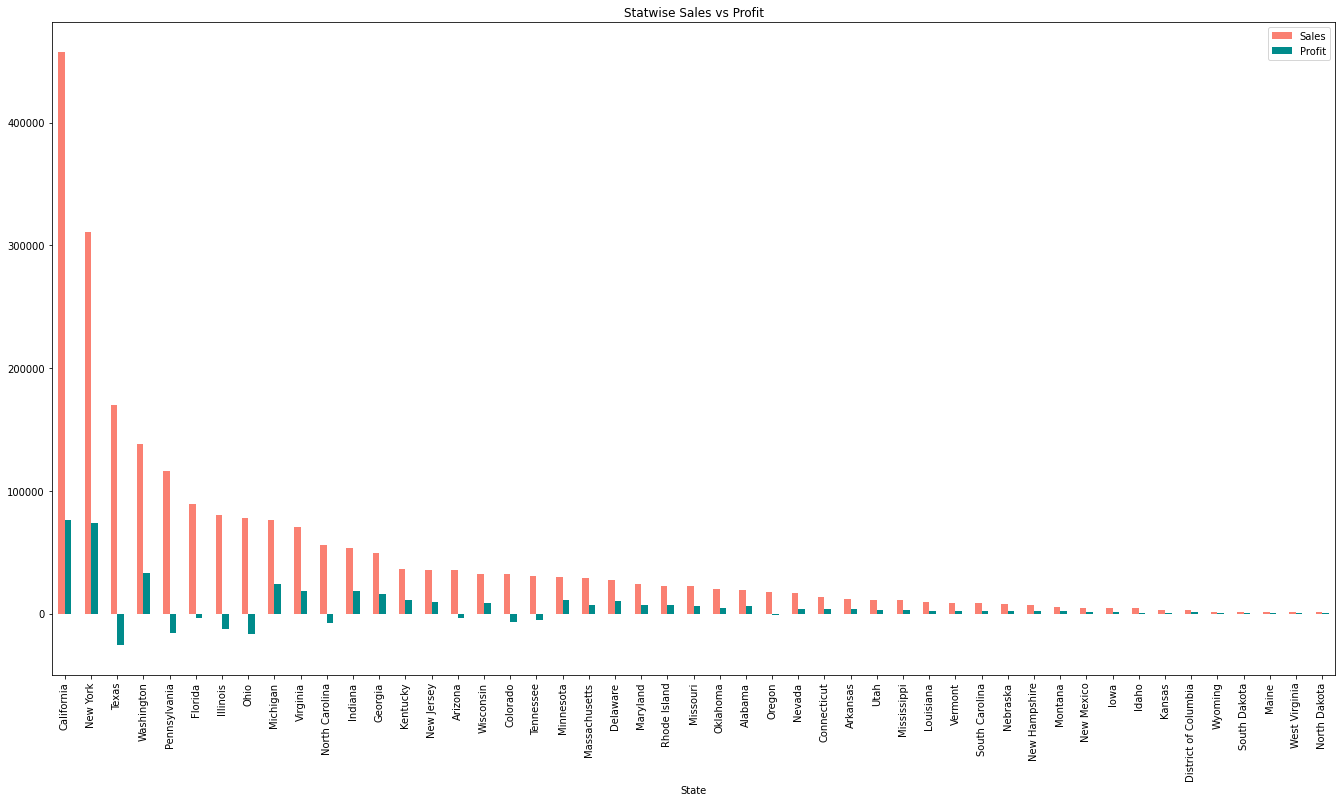

In [27]:
data.groupby("State")["Sales","Profit"].sum().sort_values(by="Sales",ascending=False).plot(kind="bar",figsize=(23,12),color=["salmon","darkcyan"]);
plt.title("Statwise Sales vs Profit");

 - **California** have high Sales
 - **North Dakota** have low Sales
 - **California** have high profit
 - **Texas** have high loss
 - **Texas, Pennsylvania,Ohio,Illinois** are loss making states

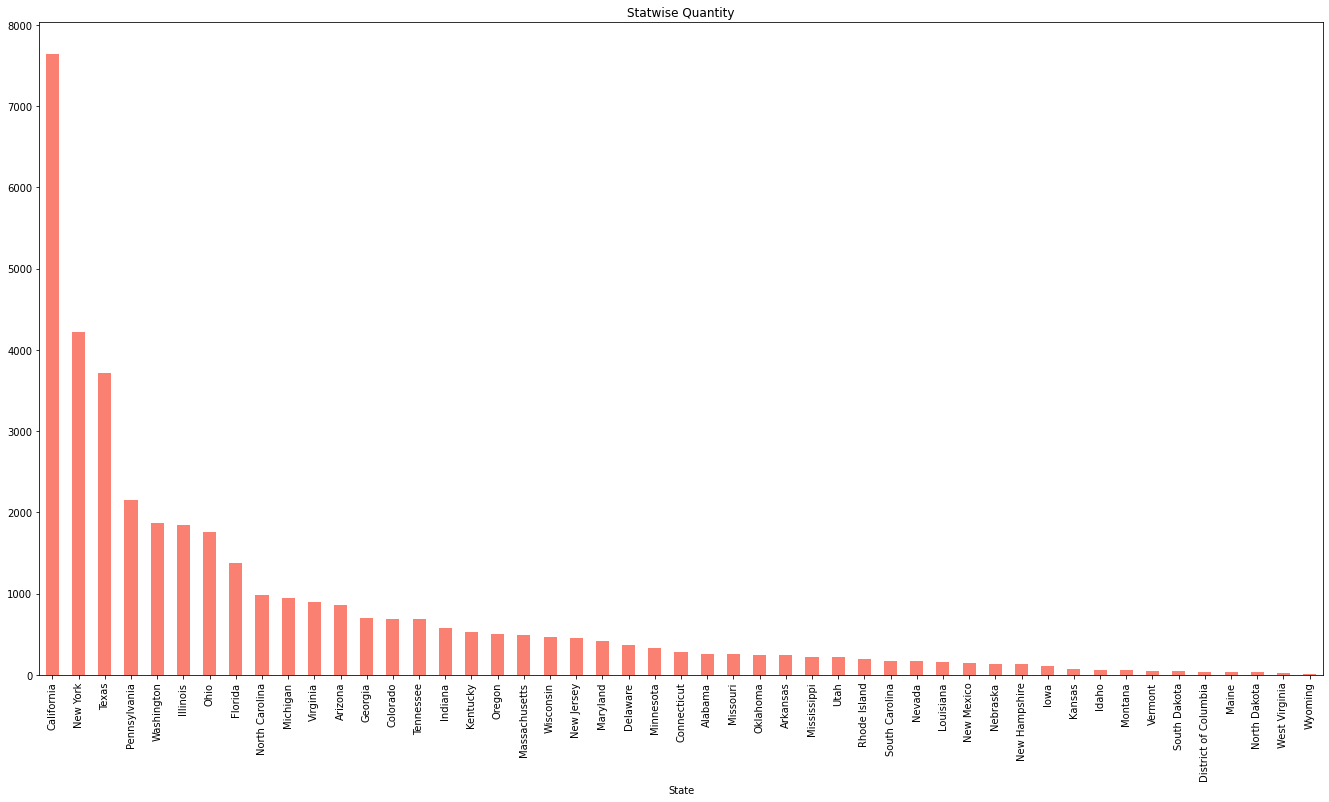

In [28]:
data.groupby("State").Quantity.sum().sort_values(ascending=False).plot(kind="bar",figsize=(23,12),color=["salmon"]);
plt.title("Statwise Quantity");

 - **California** have high Sales quantity
 - **Wyoming** have low Sales quantity

### Weak area to be imporved in Sample Super Store
 
**Region**
 
- Central region need to focus on more Profit. 
- Southern region need to focus on more volume of Sale.

**Segment**
 
- Homeoffice Segment need to focus on increasing the volume of Sale

**Category** 
 
- Volume of sale need increased in Technology as it's more profitable.
- Profit percentage need to be increased in Office Supplies.

**Sub-Category**
- More volume of sale to be increse in Copiers,Phones as they are most profit making Sub-Categories.
- Loss made on sale of Table and Bookcases need to avoided.
 
**States**
 - Stores in Texas,Pennsylvania and Ohio are need to be looked as they in Top 3 in sales volume still making loss.
